In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [43]:
crimedf = pd.read_csv("crime.csv",encoding = "ISO-8859-1")
crimedf.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [3]:
crimedf.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [48]:
# cleaning the data

#removing unnecessary columns
crimedf = crimedf.drop(["REPORTING_AREA","INCIDENT_NUMBER","OFFENSE_CODE","UCR_PART","Location"],axis =1)

# the min value of lat is -1 and max value of long is -1. These need to be changed to None
crimedf.Lat.replace(-1,None,inplace = True)
crimedf.Long.replace(-1,None,inplace = True)

# chaging the column names to lower case
crimedf = crimedf.rename(str.lower,axis='columns')

In [49]:
# Data Checks
crimedf.isnull().sum()

offense_code_group         0
offense_description        0
district                 218
shooting               60966
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
street                  1379
lat                     2602
long                    2602
dtype: int64

In [50]:
set(crimedf.shooting)

{nan, 'Y'}

In [51]:
crimedf.shooting.fillna('N',inplace=True)

In [52]:
import random
df = crimedf.loc[random.sample(range(0,1000),900)]
df.offense_code_group

C:\Users\chari\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


674        NaN
29         NaN
585        NaN
705        NaN
496        NaN
        ...   
367    Larceny
42     Robbery
955        NaN
963        NaN
170        NaN
Name: offense_code_group, Length: 900, dtype: object

In [ ]:
# considering on ly the serious crimes which come under part one
crimedf = crimedf[crimedf.UCR_PART == 'Part One']

#### Most reoccuring crimes 

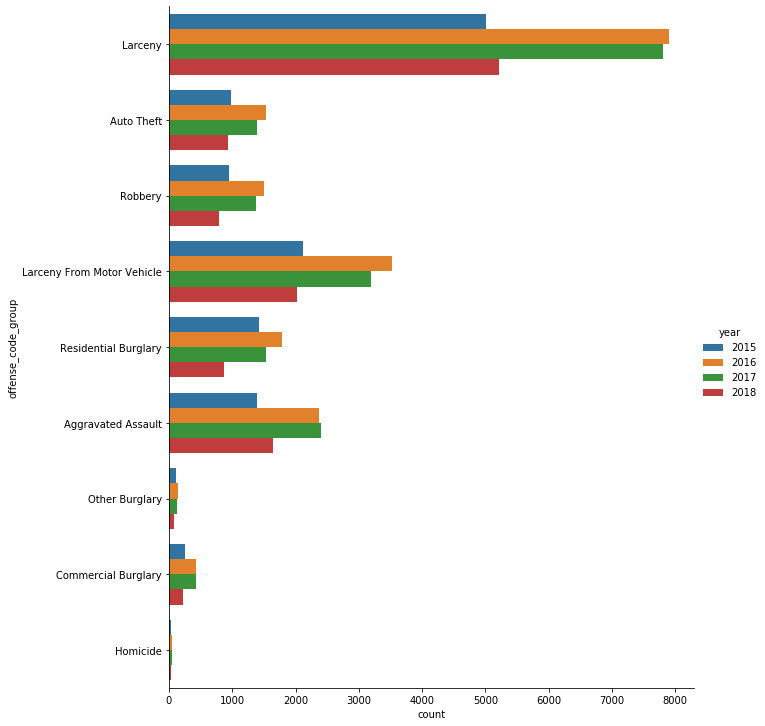

In [59]:
sns.catplot(y='offense_code_group',kind = 'count',hue = "year",height = 10,data=crimedf)

AttributeError: 'str' object has no attribute 'sum'

SyntaxError: invalid syntax (<ipython-input-47-9bef507d3729>, line 1)